# Homework 1 - Linear Regression

## Dataset
The dataset you will be using is about Life expectancy of different countries. We will explore how immunization factors, mortality factors, economic factors, social factors and other health related factors affect Life expectancy of a country.

There are two data files: "LifeExpectancy_training_modified.csv" and "LifeExpectancy_test_modified.csv"<br/>
Both files have the following fields, except Life_expectancy which is not available in "LifeExpectancy_test_modified.csv"

Features :
- Year : from 2002 to 2015
- Status : Developed or Developing status
- Adult_Mortality : Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- Alcohol : Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
- percentage_expenditure : Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- BMI: Average Body Mass Index of entire population
- Total_expenditure: General government expenditure on health as a percentage of total government expenditure (%)
- Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- HIV_AIDS: Deaths per 1000 live births HIV/AIDS (0-4 years)
- GDP: Gross Domestic Product per capita (in USD)
- Population
- Income_composition_of_resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- Schooling: Number of years of Schooling(years)
- Health_Index: Health index

Target:
- Life_expectancy: Life Expectancy in age


Training dataset, "LifeExpectancy_training_modified.csv", contains 1064 rows and 15 columns. This is the training set containing both of the features and the target.<br/>
Test dataset, "LifeExpectancy_test_modified.csv", contains 458 rows and 14 columns. This is the test set which only contains the features.<br/>

Your goal is to predict Life expectancy based on the features.

In [ ]:
import pandas as pd
import numpy as np
from statistics import mean
from sklearn import datasets

Load the training data "LifeExpectancy_training_modified.csv" in Colab and View the first 5 lines

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving LifeExpectancy_training_modified.csv to LifeExpectancy_training_modified.csv


In [ ]:
# Load the training data
import io
df = pd.read_csv(io.BytesIO(uploaded['LifeExpectancy_training_modified.csv']))

In [ ]:
# Show the first 5 lines
df.head()

,Year,Status,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling,Health_Index,Life_expectancy
0,2011,Developing,93,1.57,835.062683,64.0,7.12,81,0.1,8734.96530,4588368.0,0.758,13.2,0.475880,75.0
1,2014,Developing,152,6.41,789.077295,32.4,4.12,99,0.1,5941.84710,68416772.0,0.737,13.6,0.203275,74.6
2,2013,Developed,68,11.82,90.585012,56.6,11.14,95,0.1,554.71532,8479375.0,0.887,15.7,0.913847,81.1
3,2014,Developed,135,0.01,1.576409,59.9,5.57,94,0.1,12.27733,1998979.0,0.797,14.7,0.275401,74.8
4,2002,Developing,192,5.93,27.638103,2.2,3.70,96,0.7,296.54617,6473164.0,0.657,11.5,0.400974,71.4


## Data Exploration
We can plot a histogram of the dataframe for the features except "Status" to understand their distributions. <br/>

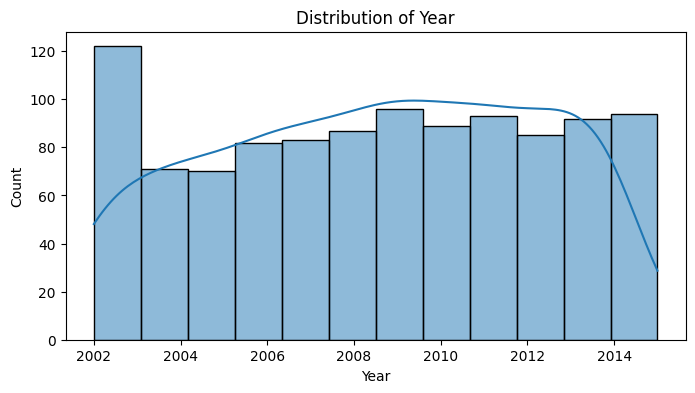

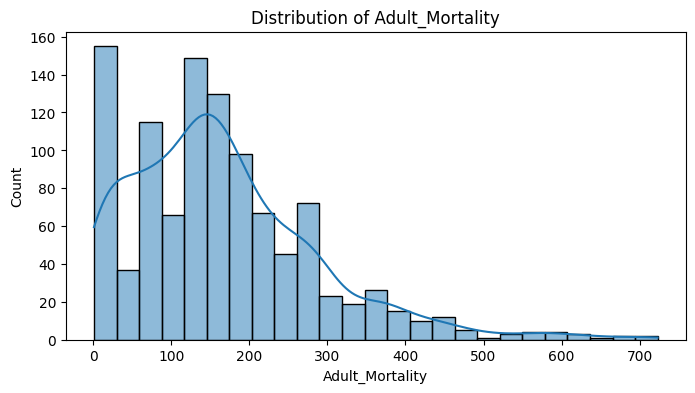

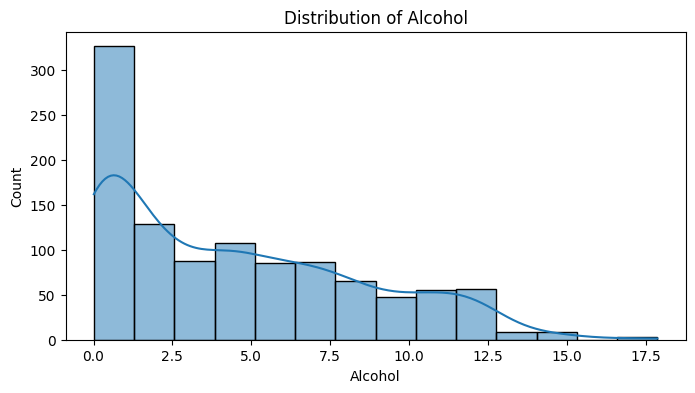

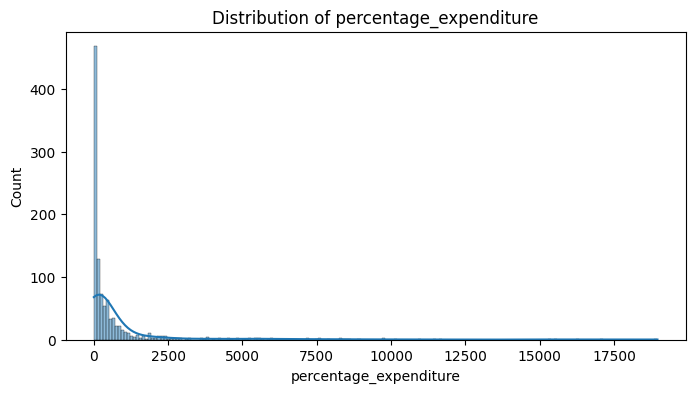

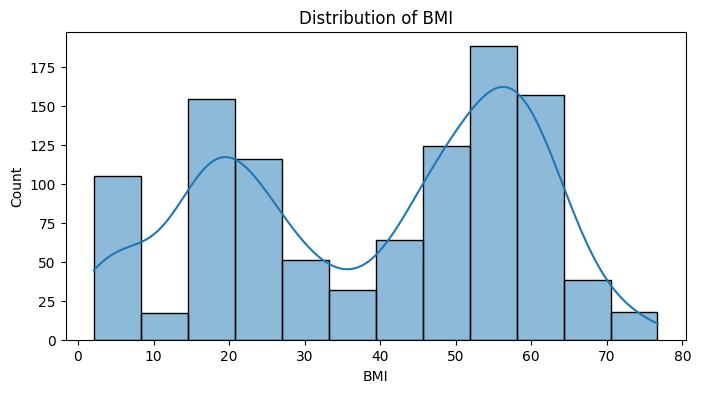

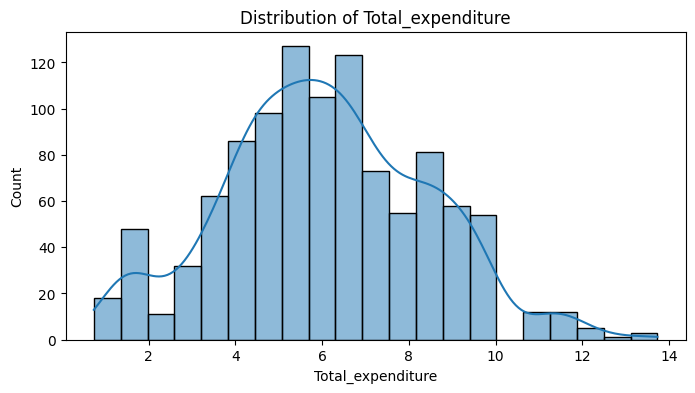

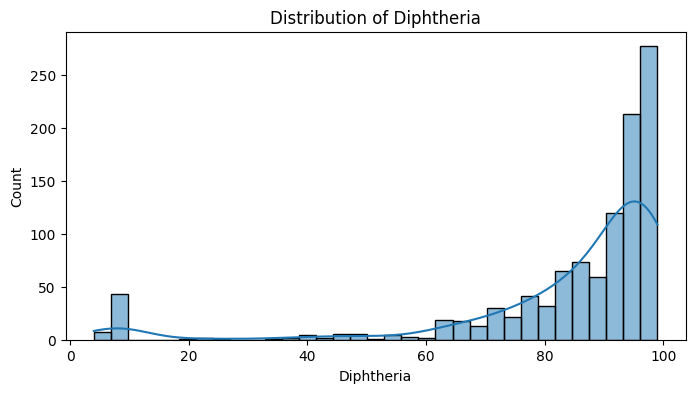

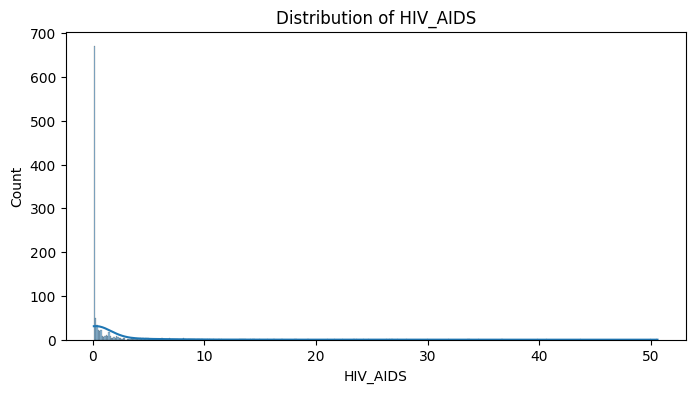

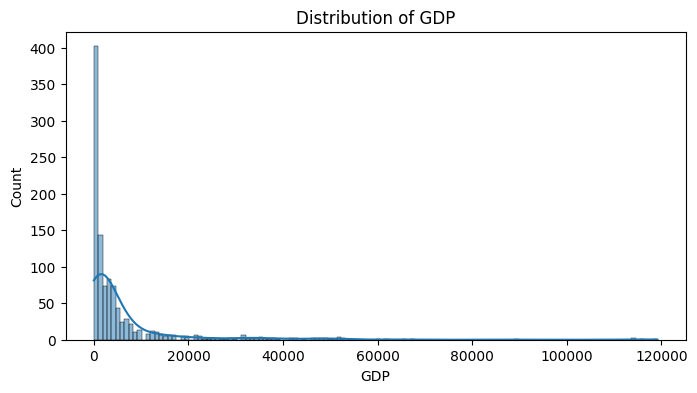

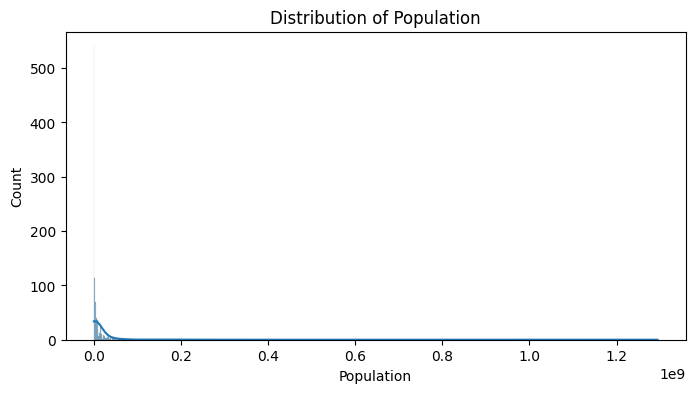

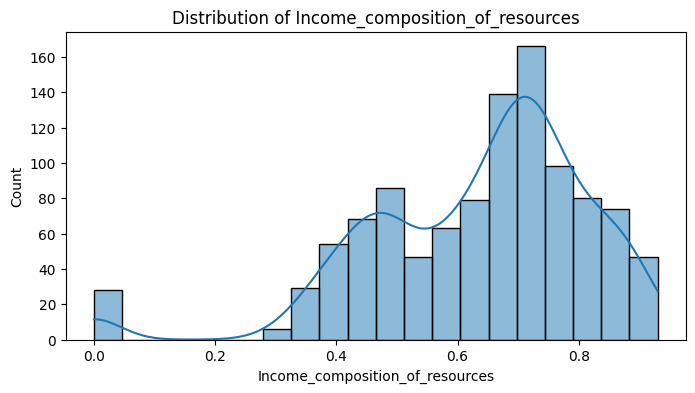

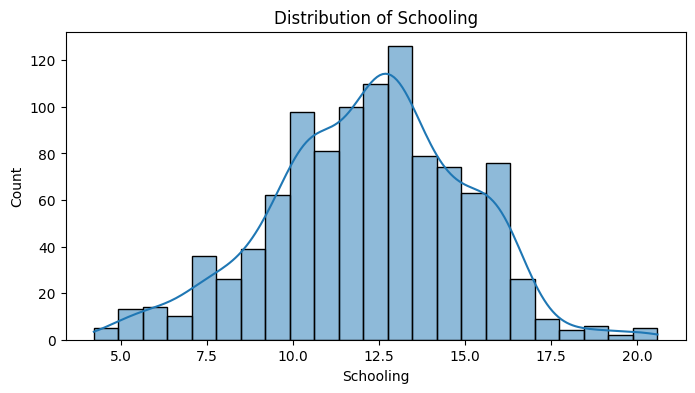

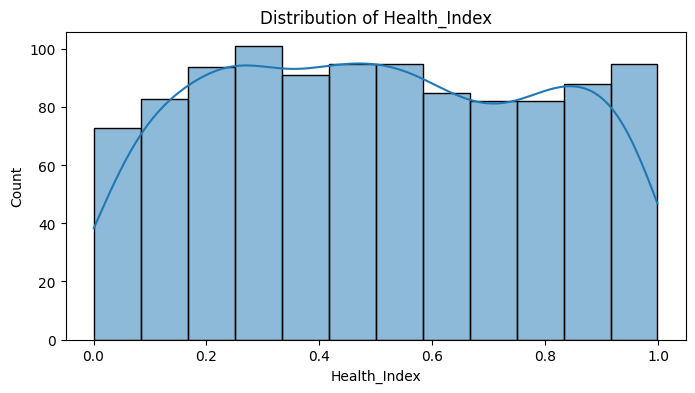

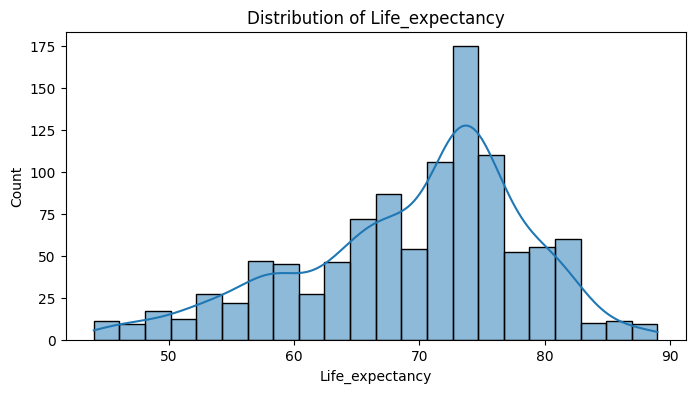

In [ ]:
### Obtain and display histograms###
import matplotlib.pyplot as plt
import seaborn as sns

for column in df.columns[[0] + list(range(2, 15))]:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

##### Q1. What can you infer from the histograms? <br/>
Ans-
* Year: Years from 2002 to 2015 share a roughly same frequency. The distribution is roughly uniform.
* Adult_Mortality: Low adult mortality rates are more common. Adult mortality rates range from 0 to around 700. The distribution is right skewed and positive valued.
* Alcohol: Low alcohol consumptions are more common. Alcohol consumptions range from 0.0 to around 17.5. The distribution is right skewed and positive valued.
* percentage_expenditure: Low percentage expenditures are more common. Percentage expenditures range from 0 to around 17500. The distribution is right skewed and positive valued.
* BMI: A BMI around 55 is most common. BMIs around 10 and 35 are not very common. BMIs range from around 2 to 75.
* Total_expenditure: A total expenditure of around 6% is most common. Total expenditures range from around 1% to 14%. The distribution is approximately normal.
* Diphtheria: High diphtheria immunization coverages are more common. Diphtheria immunization coverages range from around 5% to 98%. The distribution is left skewed and positive valued.
* HIV_AIDS: Fewer HIV AIDS deaths is more common. The number of HIV AIDS deaths ranges from 0 to around 50. The distribution is right skewed and positive valued.
* GDP: Low GDPs are more common. GDPs range from 0 to around 120000. The distribution is right skewed and positive valued.
* Population: A population of around 1e8 is most common. There is also some population of around 2e8 and 1.2e9.
* Income_composition_of_resources: An income composition of resources index of around 0.7 is most common. Income composition indeces range from 0 to 1. There are some outliers near zero. The distribution is approximately normal.
* Schooling: A schooling of around 12.5 years is most common. Schooling years range from around around 5.0 to 20.0. The distribution is approximately normal.
* Health_Index: Health indeces range from 0.0 to 1.0. The distribution is roughly uniform.
* Life Expectancy: A life expectancy of around 73 is most common. Life expectancies range from around 45 to 90. The distribution is left skewed and positive valued.

Summary:

* Skewness: Adult_Mortality, HIV_AIDS, GDP, percentage_expenditure and Population show right-skewed distributions, indicating a large number of countries with low values with a long tail towards higher values.
* Uniformity: The Health_Index shows a uniform distribution, suggesting a balanced representation across its range which may indicate diverse health condistions.
* Multi-Modality: Both BMI and Income_compostion_of_resources appear to have multi-modal distributions.


Compute the correlation matrix to get an understanding of the correlation between life_expectancy and the other features.<br/>

<ipython-input-9-e5a399c4e28b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


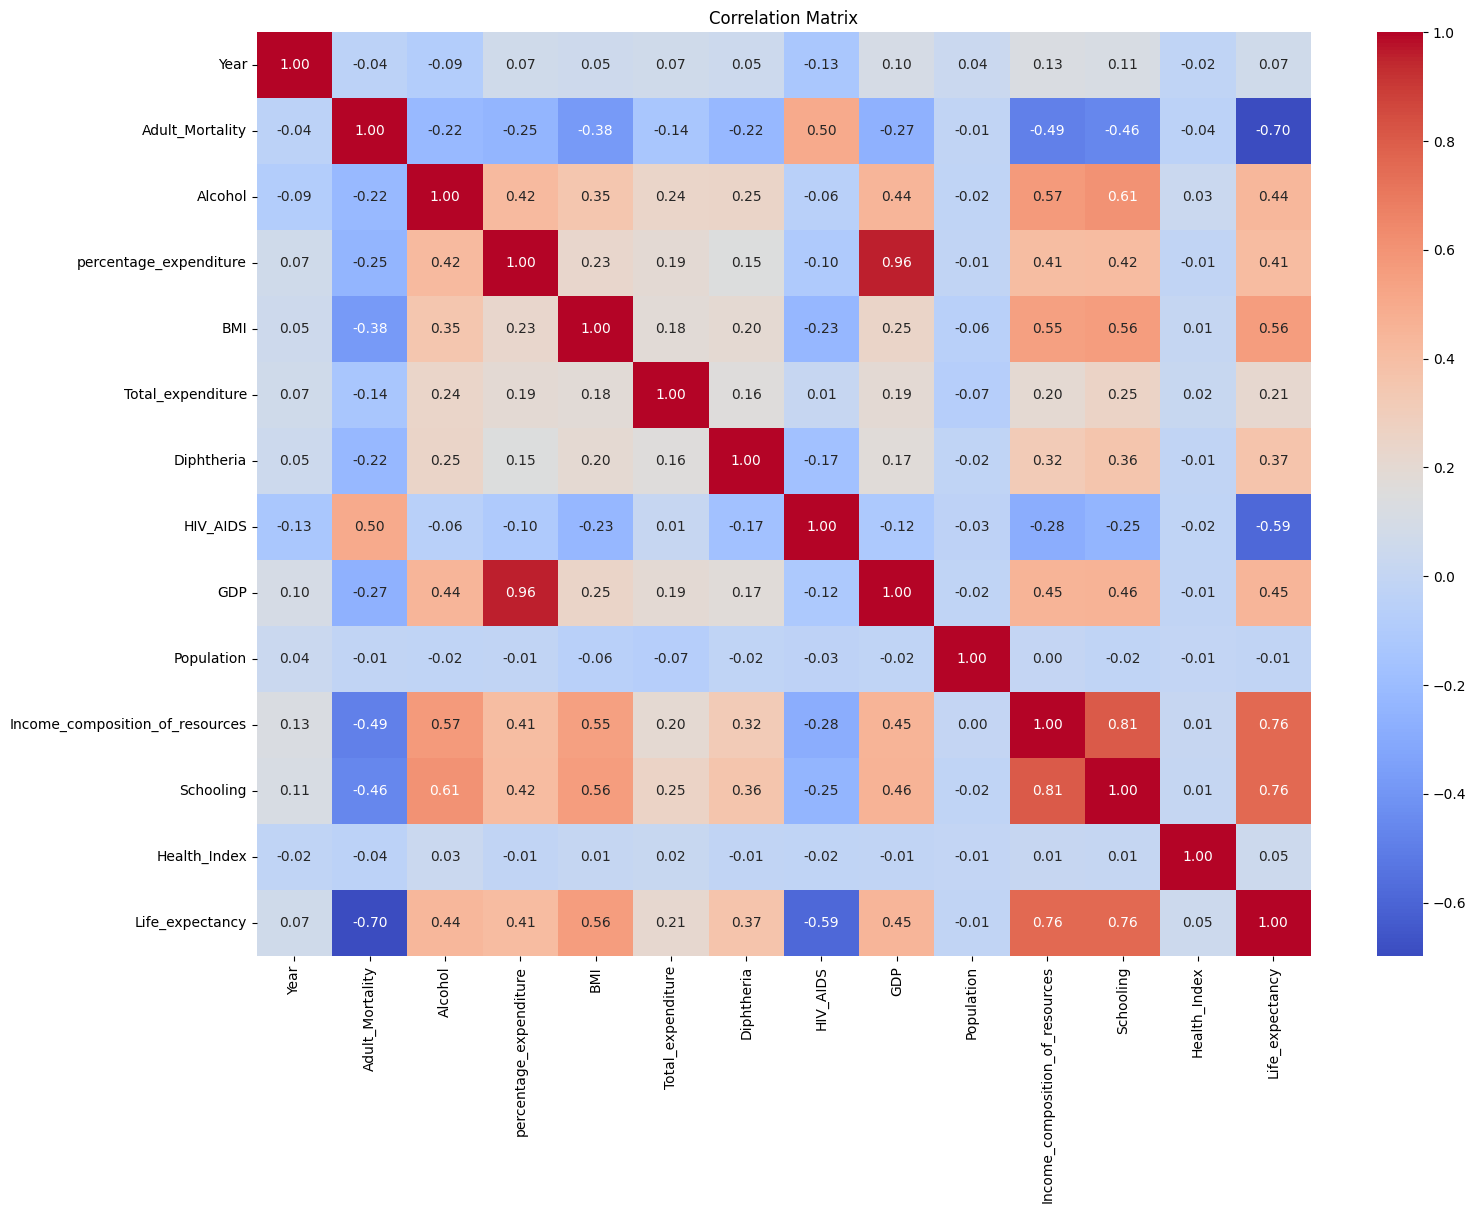

In [ ]:
### Obtain correlation matrix###
correlation_matrix = df.corr()
plt.figure(figsize=(17, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

##### Answer the following questions:<br/>

##### Q2. Why is the diagonal made up of 1's in the correlation matrix?<br/>
Ans- Each spot on the diagonal is where a variable is compared with itself. Since anything is perfectly matched with itself, the correlation is always 1.

##### Q3. Why is the matrix symmetric along a diagonal?<br/>
Ans- Because the elements symmetric along the diagonal are correlations between the same two features. Corr(A, B) = Corr(B, A).


##### Q4. Looking at the correlation matrix, if you have to choose one predictor for a simple linear regression model with Life_expectancy as the outcome, which one would you choose and why? <br/>
Ans- We would choose Income_composition_of_resources.

First of all, when choosing a predictor for a simple linear regression model, we want to select a feature that has a strong correlation with the target variable. According to the correlation matrix, Income_composition_of_resources and Schooling shows the strongest correlation with Life Expectancy (0.76).

Secondly, we need to choose the feature based on its conceptual relevance with the target variable. Income_composition_of_resources reflects a country's overall economic and social development level, which is likely to have a significant impact on its healthcare quality. For these reasons, we'd choose Income_composition_of_resources.

##### Q4.1. Is there any variable that does not make sense to you and why? <br/>
Ans- Unhealthy features such as Alcohol, BMI(high), and Diphtheria having positive correlations with Life_expectancy might be incorrect. Health Index has a lower degree of correlation as compared to Alcohol.

### Standardization of features

Feature standardization makes the values of each feature in the data have zero-mean and unit-variance. This method is widely used for normalization in many machine learning algorithms. The general method of calculation is to determine the distribution mean and standard deviation for each feature. Next we subtract the mean from each feature. Then we divide the values of each feature by its standard deviation.

$x'$ = ($x$ - $\bar{x}$)/$\sigma$

where $x$ is the original feature vector,
$\bar{x}$ is the mean of the feature vector and
$\sigma$ is its standard deviation.

This is also called Z-score Normalization.

Perform Z-score Normalization on the features (except "Year" and "Status") in both training and test set.

In [ ]:
uploaded = files.upload()

Saving LifeExpectancy_test_modified.csv to LifeExpectancy_test_modified.csv


In [ ]:
# Load the test data
df_test = pd.read_csv(io.BytesIO(uploaded['LifeExpectancy_test_modified.csv']))

In [ ]:
from sklearn.preprocessing import StandardScaler
# from sklearn.compose import ColumnTransformer

### Perform Z-score normalization###
# Create the normalizer
normalizer = StandardScaler()

# Normalize the train set
df_temp = df[["Year","Status"]]
df.drop(["Year","Status"], axis = 1, inplace = True)
col_names = df.columns
df = pd.DataFrame(normalizer.fit_transform(df), columns = col_names)
df = pd.concat([df,df_temp], axis = 1)
df.head()

,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling,Health_Index,Life_expectancy,Year,Status
0,-0.595190,-0.726456,0.048715,1.255572,0.445559,-0.171244,-0.313881,0.227204,-0.139413,0.671470,0.356420,-0.096784,0.615439,2011,Developing
1,-0.109184,0.481078,0.023969,-0.320769,-0.831846,0.692054,-0.313881,-0.000131,0.925595,0.556023,0.499431,-1.055036,0.570324,2014,Developing
2,-0.801125,1.830823,-0.351900,0.886429,2.157283,0.500210,-0.313881,-0.438595,-0.074490,1.380648,1.250240,1.442743,1.303449,2013,Developed
3,-0.249220,-1.115662,-0.399797,1.051047,-0.214434,0.452249,-0.313881,-0.482745,-0.182618,0.885873,0.892712,-0.801501,0.592882,2014,Developed
4,0.220312,0.361323,-0.385773,-1.827272,-1.010683,0.548171,-0.201351,-0.459608,-0.107964,0.116223,-0.251379,-0.360090,0.209401,2002,Developing


In [ ]:
# Normalize the test set with same normalizer for data consistency
df_temp = df_test[['Year','Status']]
df_test.drop(["Year","Status"], axis = 1, inplace = True)
col_names = df_test.columns
df_test = pd.DataFrame(normalizer.fit_transform(df_test), columns = col_names)
df_test = pd.concat([df_test,df_temp], axis = 1)
df_test.head()

,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Health_Index,Schooling,Year,Status
0,0.764753,-1.088707,-0.387125,-0.949179,0.951465,-0.663302,-0.344694,-0.490177,-0.175739,-0.976549,1.579474,-0.859554,2011,Developing
1,0.856804,-1.083814,-0.375553,-1.026485,1.156188,-0.838525,-0.344694,-0.459800,-0.178318,-1.095864,0.530838,-1.141203,2008,Developing
2,-0.669720,0.222512,-0.122149,1.004070,-0.009844,0.694674,-0.344694,-0.061370,-0.203512,0.637039,0.845413,0.478281,2011,Developing
3,-1.229701,0.171140,-0.374864,0.736078,0.172627,0.650868,-0.344694,-0.469038,-0.203343,0.335912,0.094190,-0.401873,2005,Developing
4,-1.206688,-0.041689,-0.382428,0.633004,0.239385,0.607063,-0.344694,-0.477809,-0.203052,0.273414,-0.564275,-0.437079,2003,Developing


In [ ]:
# Change the order of columns in test dataset to match the column order in train dataset
df_temp = df_test[["Health_Index", 'Year', 'Status']]
df_test.drop(['Health_Index', 'Year', 'Status'], axis = 1, inplace = True)
df_test = pd.concat([df_test, df_temp], axis = 1)
df_test.head()

,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling,Health_Index,Year,Status
0,0.764753,-1.088707,-0.387125,-0.949179,0.951465,-0.663302,-0.344694,-0.490177,-0.175739,-0.976549,-0.859554,1.579474,2011,Developing
1,0.856804,-1.083814,-0.375553,-1.026485,1.156188,-0.838525,-0.344694,-0.459800,-0.178318,-1.095864,-1.141203,0.530838,2008,Developing
2,-0.669720,0.222512,-0.122149,1.004070,-0.009844,0.694674,-0.344694,-0.061370,-0.203512,0.637039,0.478281,0.845413,2011,Developing
3,-1.229701,0.171140,-0.374864,0.736078,0.172627,0.650868,-0.344694,-0.469038,-0.203343,0.335912,-0.401873,0.094190,2005,Developing
4,-1.206688,-0.041689,-0.382428,0.633004,0.239385,0.607063,-0.344694,-0.477809,-0.203052,0.273414,-0.437079,-0.564275,2003,Developing


**Feature Combinations List**

After creating an initial model feature selection should be done to optimize the model. The below code creates a list of all the possible combinations of features.

In [ ]:
from itertools import combinations as cb

# Create a list of all the possible feature_combinations before onehotencoding to reduce the feature space
col_list = df.columns[df.columns != 'Life_expectancy'].to_list()
feature_combinations = []
for i in range(len(col_list)):
  feature_combinations.extend(cb(col_list, i + 1))

##### Q5. What are the advantages and disadvantages of using Z-score Normalization?<br/>
Ans-  
* Advantages: Z-score normalization scales the features to have zero mean and unit variance, standardizing the scale to allow for direct comparisons between different features. Normalization makes gradient descent faster due to similar scales.
* Disadvantages: Z-score normalization has an assumption that the distribution of data is normal. If the data is not normally distributed, Z-score normalization might become ineffective. Normalized features become harder to interpret.

##### Q6. In this dataset, do you need to use the Z-score Normalization? Explain.<br/>
Ans- Z-score normalization is typically applied when the features in the dataset have different scales. Features in both training and test data sets have very different ranges, thus standardizing the features can help ensure that each feature contributes equally to the model, allowing for direct comparisons between different features.

### One-Hot Encoding

"Year" and "Status" can only take discrete values. We need to perform one-hot encoding on discrete values for it to be processed in the model. One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.
Perform one-hot encoding on "Year" and "Status" and print the shape of your encoded array

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Create an encoder for one-hot encoding
enc = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the "Year" and "Status" columns in train dataset
enc_df = pd.DataFrame(enc.fit_transform(df[['Year','Status']]).toarray())
enc_df.columns = enc.get_feature_names_out(['Year','Status'])

# Drop the categorical variables
df.drop(["Year", "Status"], axis = 1, inplace = True)
df = pd.concat([df,enc_df], axis = 1)
df.head()

,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,...,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Status_Developed,Status_Developing
0,-0.595190,-0.726456,0.048715,1.255572,0.445559,-0.171244,-0.313881,0.227204,-0.139413,0.671470,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.109184,0.481078,0.023969,-0.320769,-0.831846,0.692054,-0.313881,-0.000131,0.925595,0.556023,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.801125,1.830823,-0.351900,0.886429,2.157283,0.500210,-0.313881,-0.438595,-0.074490,1.380648,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.249220,-1.115662,-0.399797,1.051047,-0.214434,0.452249,-0.313881,-0.482745,-0.182618,0.885873,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.220312,0.361323,-0.385773,-1.827272,-1.010683,0.548171,-0.201351,-0.459608,-0.107964,0.116223,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Encode the test dataset with the same encoder to ensure data consistency
enc_df = pd.DataFrame(enc.transform(df_test[['Year','Status']]).toarray())
enc_df.columns = enc.get_feature_names_out(['Year','Status'])

# Drop categorical variables and add one-hot encoded columns
df_test.drop(["Year", "Status"], axis = 1, inplace = True)
df_test = pd.concat([df_test,enc_df], axis = 1)

df_test.shape

(458, 28)

Q7. What are the other types of encodings and why did we use One-hot encoding for "Year" and "Status"?

Ans-
Other types of encodings include label encoding, binary encoding, ordinal encoding, target encoding, and frequency encoding.

One-hot encoding has an ability to handel non-ordinal categorical variables. Year and Status don't have a natural order that makes sense for the computer.

## Multiple Linear Regression

In the big data era, it is highly unlikely that we are interested in the effect of a single variable on another. To simultaneously account for the effects of multiple variables, we use multiple regression (which accounts for the covariances between predictors).

While the algorithmic solution to multiple regression exists, it is easier to conceptualize in terms of linear algebra. The optimal $\hat{\beta}$ vector that minimizes the residual sum of squares is:

$\hat{\beta} = (X^TX)^{-1}X^Ty $


Perform multiple linear regression on the training dataset, where the outcome is "Life_expectancy".

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
### Bulding and fitting the Multiple Linear Regression model###

# Create the X and Y for regression
Y_train = df['Life_expectancy']
X_train = df.drop('Life_expectancy', axis = 1)

In [ ]:
# Create and fit the model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
### Evaluate the Linear Regression model by computing MSE on the training set###
from sklearn.metrics import mean_squared_error

# Predict the Y with the given X
Y_pred = model.predict(X_train)
print("MSE on training set is ", round(mean_squared_error(Y_pred, Y_train), 4))

MSE on training set is  0.1622


Q8. Print the value of coefficients and also the corresponding variable names for the coefficients.

In [ ]:
# Create a dataframe with all the coefficients
df_coef = pd.DataFrame(zip(X_train.columns, model.coef_), columns = ['Variable', 'Coefficient'])

# Add the intercept row
df_coef.loc[-1] = ["Intercept", model.intercept_]
df_coef.index = df_coef.index + 1
df_coef = df_coef.sort_index()
df_coef

,Variable,Coefficient
0,Intercept,0.043902
1,Adult_Mortality,-0.227927
2,Alcohol,-0.054964
3,percentage_expenditure,0.069611
4,BMI,0.079994
5,Total_expenditure,0.029063
6,Diphtheria,0.056689
7,HIV_AIDS,-0.302753
8,GDP,0.017657
9,Population,-0.005921


Q9. Is there a problem of multicolinearity? Explain what you can do

Ans-  
Yes some of the idependent variables have high enough correlation with other independent variables that we cannot ignore. One example is percentage_expenditure and gdp. We can find pairs of correlated features from correlation matrix.The problem with correlated features is that they increase the number of features of the model without contributing new information or only partially contributing. This increases variance without sufficient decrease in bias making the model bad on test set.

### Goodness of fit

A model can always make predictions. But it is important to determine how good the model is.
How do we know that our model captures the data well? When evaluating model fit, a good metric is $R^2$, which corresponds to the amount of variance explained by the model. The formula for $R^2$ is the following:

$R^2$ = $1 - \dfrac{RSS}{TSS}$<br/>
where:<br/>
$RSS = \Sigma(y - \hat{y})^2$<br/>
$TSS = \Sigma(y - \bar{y})^2$<br/>

$R^2$ is also one metric for comparing models against each other. It is intuitive to say that the model that explains more variation in the data is a better fit than one that explains less variation.

Fill in the code for calculation of R2 score

In [ ]:
from sklearn.metrics import r2_score

$R^2$ for model with "Schooling" as predictor and "Life_expectancy" as outcome

In [ ]:
# Print R2 score
model.fit(np.array(X_train['Schooling']).reshape(-1, 1),Y_train)
Y_pred = model.predict(np.array(X_train['Schooling']).reshape(-1, 1))
print("R2 score for model with schooling as predictor of life_expectancy is", round(r2_score(Y_train, Y_pred), 5))

R2 score for model with schooling as predictor of life_expectancy is 0.57022


$R^2$ for model with "Schooling", "Adult_Mortality" as predictor and "Life_expectancy" as outcome

In [ ]:
# Print R2 score
model.fit(X_train[["Schooling","Adult_Mortality"]],Y_train)
Y_pred = model.predict(X_train[["Schooling","Adult_Mortality"]])
print("R2 score for model with schooling and adult_mortality as predictor of life_expectancy is", round(r2_score(Y_train, Y_pred), 5))

R2 score for model with schooling and adult_mortality as predictor of life_expectancy is 0.72483


$R^2$ for model with "Schooling","Adult_Mortality" and "Population" as predictor and "Life_expectancy" as outcome

In [ ]:
# Print R2 score
model.fit(X_train[["Schooling","Adult_Mortality","Population"]],Y_train)
Y_pred = model.predict(X_train[["Schooling","Adult_Mortality","Population"]])
print("R2 score for model with schooling, adult_mortality and population as predictor of life_expectancy is", round(r2_score(Y_train, Y_pred), 5))

R2 score for model with schooling, adult_mortality and population as predictor of life_expectancy is 0.72485


You can see $R^2$ is always going up as we keep adding features.

This is one drawback of only using $R^2$ to evaluate your model. Adding predictors seems to always improve the predictive ability of your model, though it may not be true.

That is to say, we are not necessarily interested in making a perfect prediciton of our training data. If we were, we would always use all of the predictors available. Rather, we would like to make a perfect prediction of our test data. In this case, adding all the predictors may not be a good idea due to the trade-off between bias and variance. Thus, we are interested in the most predictive features, in the hopes that we can create a simpler model that performs well in the future.

This is why we consider another metric, Adjusted R2.
The adjusted R-squared increases only if the new term improves the model more than would be expected by chance.


$AdjustedR^2$ = $1 - \dfrac{(1-R^2)(n-1)}{(n-p-1)}$<br/>
where:<br/>
n = number of samples<br/>
p = number of features

Fill in the code for calculation of adjusted R2 score

Adjusted $R^2$ for model with "Schooling" as predictor and "Life_expectancy" as outcome

In [ ]:
# Print Adjusted R2 score
model.fit(np.array(X_train['Schooling']).reshape(-1, 1),Y_train)
Y_pred = model.predict(np.array(X_train['Schooling']).reshape(-1, 1))
adj_r2 = 1 - ((1 - r2_score(Y_train, Y_pred)) * (len(X_train) - 1) / (len(X_train) - 2))
print("Adjusted R2 score for model with schooling as predictor of life_expectancy is", round(adj_r2, 5))

Adjusted R2 score for model with schooling as predictor of life_expectancy is 0.56982


Adjusted $R^2$ for model with "Schooling", "Adult_Mortality" as predictor and "Life_expectancy" as outcome.

In [ ]:
# Print Adjusted R2 score
model.fit(X_train[["Schooling","Adult_Mortality"]],Y_train)
Y_pred = model.predict(X_train[["Schooling","Adult_Mortality"]])
adj_r2 = 1 - ((1 - r2_score(Y_train, Y_pred)) * (len(X_train) - 1) / (len(X_train) - 3))
print("R2 score for model with schooling and adult_mortality as predictor of life_expectancy is", round(adj_r2, 5))

R2 score for model with schooling and adult_mortality as predictor of life_expectancy is 0.72431


Adjusted $R^2$ for model with "Schooling","Adult_Mortality" and "Population" as predictor and "Life_expectancy" as outcome

In [ ]:
# Print Adjusted R2 score
model.fit(X_train[["Schooling","Adult_Mortality","Population"]],Y_train)
Y_pred = model.predict(X_train[["Schooling","Adult_Mortality","Population"]])
adj_r2 = 1 - ((1 - r2_score(Y_train, Y_pred)) * (len(X_train) - 1) / (len(X_train) - 4))
print("R2 score for model with schooling and adult_mortality as predictor of life_expectancy is", round(adj_r2, 5))

R2 score for model with schooling and adult_mortality as predictor of life_expectancy is 0.72407


### K-fold Cross-Validation

However, adjusted $R^2$ is not enough to help us ahieve the best model, a more robust method is k-fold cross-validation.

* Randomly split dataset into K equal-sized subsets, or folds
* Treat each fold as validation set (train on all but K'th fold and test on K'th fold only)

* The overall error is then the mean error over all K models.
* Most common are 5- or 10-fold cross-validation

Please implement a 5-fold cross-validation by yourselves to find the best model in terms of Mean Square Error(MSE)

**Do not use sklearn.model_selection.cross_val_score or other built-in cross-validaiton functions**

In [ ]:
df_adela = pd.concat([X_train, Y_train], axis = 1)
df_adela = df_adela.sample(frac = 1)
a = np.array_split(df_adela, 5)
len(a)

5

In [ ]:
# Design a function to implement 5-fold cross-validation.
# The input: training features X, training target y and # of folds f=5.
# The output: the average of MSE over the 5 folds.
def cross_val_mse(X, y, f = 5):
    mse = []

    # Split the data into 5 equal datasets
    df = pd.concat([X, y], axis = 1)
    df = df.sample(frac = 1)
    df_split = np.array_split(df, f)

    # Train a model on leaving one data set to test on and getting a list of mse
    for i in range(len(df_split)):

      # Combine all the split except the ith split
      train = pd.concat(df_split[:i] + df_split[i + 1:], axis = 0)
      test = df_split[i]

      # Create train and test datasets
      y_train = train.iloc[:,-1:]
      x_train = train.iloc[:,:-1]

      y_test = test.iloc[:,-1:]
      x_test = test.iloc[:,:-1]

      # Train, predict, and generate mse
      model.fit(x_train, y_train)
      y_pred = model.predict(x_test)
      mse.append(mean_squared_error(y_pred, y_test))

    return sum(mse)/len(mse)

In [ ]:
# Create a list of column names of one-hot encoded columns
status_list = list(df.columns[-2:])
year_list = list(df.columns[-16:-2])

In [ ]:
# By using your above functions, find the best combination of features, which has the lowest averaged MSE
def best_feature_combination(X, y):
  # Initialize mse to a large value and best_combination as empty list
  mse_min = 100000
  best_combination = []

  # Loop through the feature_combinations list to find the best_combination
  for feature_tuple in feature_combinations:
    feature_list = list(feature_tuple)

    # Check for categorical variables, add corresponding one-hot encoded columns, and drop categorical columns
    if "Year" in feature_list:
      feature_list.extend(year_list)
      feature_list.remove("Year")
    if "Status" in feature_list:
      feature_list.extend(status_list)
      feature_list.remove("Status")

    # Create the train set with columns corresponding to the feature_list
    X_train = X[feature_list]

    # Calculate the mse after k-fold cross validation on the feature_combination
    mse = cross_val_mse(X_train,y)

    # Calculate the adjusted R2 to track the complexity of model
    model.fit(X_train, y)
    Y_pred = model.predict(X_train)
    adj_r2 = 1 - ((1 - r2_score(y, Y_pred)) * (len(X_train) - 1) / (len(X_train) - 1 - len(feature_list)))

    # Reassign mse_min and best_combination
    if mse < mse_min:
      print(adj_r2, mse, feature_list)
      mse_min = mse
      best_combination = feature_list

  return best_combination, mse_min

In [ ]:
# Print the best features and the corresponding mse
best_combination, mse = best_feature_combination(X_train, Y_train)
print(best_combination, mse)

0.4873823200077396 0.5139781527441787 ['Adult_Mortality']
0.571911643868048 0.4320587452631271 ['Income_composition_of_resources']
0.5729729311614916 0.4278373108767911 ['Adult_Mortality', 'Alcohol']
0.587209696923908 0.41301801874762445 ['Adult_Mortality', 'BMI']
0.7139467604501435 0.2889548982310243 ['Adult_Mortality', 'Income_composition_of_resources']
0.7243101876640934 0.2781007508115975 ['Adult_Mortality', 'Schooling']
0.7420984601733125 0.25905911326314246 ['HIV_AIDS', 'Schooling']
0.7767151890235506 0.2255535384856143 ['Adult_Mortality', 'HIV_AIDS', 'Income_composition_of_resources']
0.7953143099012254 0.2073153247293254 ['Adult_Mortality', 'HIV_AIDS', 'Schooling']
0.8034810960109565 0.1984264596289793 ['Adult_Mortality', 'percentage_expenditure', 'HIV_AIDS', 'Schooling']
0.8184169808096051 0.18355361449694346 ['Adult_Mortality', 'HIV_AIDS', 'Income_composition_of_resources', 'Schooling']


### Test your model
Now, apply your best model to predict the target values from the test feature set "LifeExpectancy_test_modified.csv". We will grade this part based on your prediction error.

Hint: Please be careful on standardization and one-hot encoding (if you use), the test set should be consistent with the training set in terms of any transformation.

Hint2: You may want to modify the previous steps to make the transformation of the test set consistent with the training set.

In [ ]:
# Prepare the train and test data set with best combination of features
X_train = df[best_combination]
X_test = df_test[best_combination]
Y_train = df['Life_expectancy']

# Check the model
model.fit(X_train, Y_train)
y_pred = model.predict(X_train)
print("Adjusted R2_score is ", 1 - ((1 - r2_score(y_pred, Y_train)) * (len(X_train) - 1) / (len(X_train) - 1 - len(X_train.columns))))

Adjusted R2_score is  0.7981438284774518


In [ ]:
# Output prediction on test set as y_pred.
y_pred = model.predict(X_test)
y_pred

array([-0.60237329, -0.77300055,  0.66207374,  0.41064136,  0.36018102,
        0.40419259,  0.16138936,  0.34351153, -0.73040532, -0.70723195,
       -0.82841384, -1.13868259,  0.93061505,  0.89233334,  1.12957345,
        0.89436589,  0.72843939,  0.44962413,  0.51901299,  0.39309666,
        0.18861144,  0.13888509,  2.42183055,  2.30009751,  1.51933489,
        1.61974079,  1.4857845 ,  1.44117981,  1.4537403 ,  1.10257752,
        0.51850044,  0.36326685,  0.33956498,  0.15076098,  0.0770114 ,
       -0.13418716, -0.03107041, -0.39673595, -0.46328351, -0.55797787,
       -0.52170314, -0.58733671,  0.46417109,  0.55106221,  0.0311547 ,
        0.23596555,  1.18647116,  1.15838621,  1.23676967,  1.08549207,
        1.37788921,  1.44281158,  0.32875479,  0.26111317,  0.29542183,
        0.25799509,  0.13546931, -0.49934904, -0.90432413, -1.01005292,
       -1.09674345,  0.03016368, -0.96935306, -1.34683336,  0.37398422,
        0.54763785, -0.29933007, -0.93059014, -1.01737906, -1.66